In [1]:
import pandas as pd
df_train = pd.read_csv('twitter_training.csv', index_col = False)
df_val = pd.read_csv('twitter_validation.csv', index_col = False)


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [2]:
df_train.columns = ['social', 'Entity', 'Sentiment', 'Content']
df_val.columns = ['social', 'Entity', 'Sentiment', 'Content']
df_train
df_val

,social,Entity,Sentiment,Content
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [3]:
def convert(length):
    length = str(length)
    return length

df_train['Content'] = df_train['Content'].apply(convert)
df_val['Content'] = df_train['Content'].apply(convert)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   social     74681 non-null  int64 
 1   Entity     74681 non-null  object
 2   Sentiment  74681 non-null  object
 3   Content    74681 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [4]:
# training data feature
tweet_train = df_train["Content"]
# valiation data feature
tweet_valid = df_val["Content"]
# training data output value
target_train = df_train['Sentiment']
# validation data output value
target_valid = df_val['Sentiment']

In [5]:
import tensorflow as tf
max_num_words = 5000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_num_words, filters = '"#$%&()*+-/:;<=>@[\]^_`{|}~')

tokenizer.fit_on_texts(tweet_train)
x_train = tokenizer.texts_to_sequences(tweet_train)
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen = max_num_words, padding = 'post')


In [6]:
tokenizer.fit_on_texts(tweet_valid)
x_valid = tokenizer.texts_to_sequences(tweet_valid)
x_valid = tf.keras.preprocessing.sequence.pad_sequences(x_valid, maxlen = max_num_words, padding='post')

In [7]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

label = LabelEncoder()
endcoded_train = label.fit_transform(target_train)
endcoded_val = label.fit_transform(target_valid)

y_train = tf.keras.utils.to_categorical(endcoded_train)
y_valid = tf.keras.utils.to_categorical(endcoded_val)

onehot = OneHotEncoder()
endcoded_val = endcoded_val.reshape(len(endcoded_val), 1)
onehot.fit(endcoded_val)


OneHotEncoder()

In [8]:

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128, input_dim = x_train.shape[1], activation='relu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='softmax'))
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               640128    
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               1

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"], run_eagerly = True)

In [10]:
print("Training features:",x_train.shape)
print("Training labels:", y_train.shape)
print("Validation features:",x_valid.shape)
print("Validation labels:", y_valid.shape)

Training features: (74681, 5000)
Training labels: (74681, 4)
Validation features: (999, 5000)
Validation labels: (999, 4)


Epoch 1/20
1167/1167 [==============================] - 567s 485ms/step - loss: 1.4105 - accuracy: 0.3057 - val_loss: 1.3872 - val_accuracy: 0.2943
Epoch 2/20
1167/1167 [==============================] - 532s 456ms/step - loss: 1.3546 - accuracy: 0.3303 - val_loss: 1.3751 - val_accuracy: 0.2953
Epoch 3/20
1167/1167 [==============================] - 1142s 979ms/step - loss: 1.3522 - accuracy: 0.3351 - val_loss: 1.3830 - val_accuracy: 0.2943
Epoch 4/20
1167/1167 [==============================] - 493s 423ms/step - loss: 1.3508 - accuracy: 0.3386 - val_loss: 1.3758 - val_accuracy: 0.2833
Epoch 5/20
1167/1167 [==============================] - 530s 454ms/step - loss: 1.3480 - accuracy: 0.3414 - val_loss: 1.3950 - val_accuracy: 0.2843
Epoch 6/20
1167/1167 [==============================] - 3100s 3s/step - loss: 1.3473 - accuracy: 0.3409 - val_loss: 1.3813 - val_accuracy: 0.2903
Epoch 7/20
1167/1167 [==============================] - 631s 541ms/step - loss: 1.3443 - accuracy: 0.3438 - val_l

In [ ]:
history = model.fit(x_train, y_train, batch_size=64 , epochs=20, validation_data=(x_valid, y_valid))

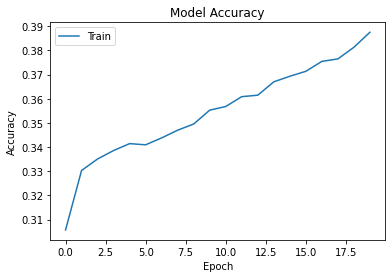

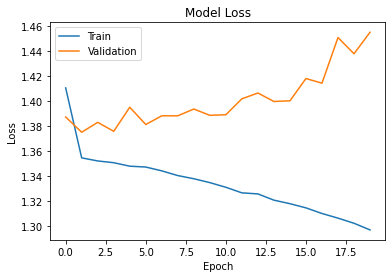

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [13]:
model.save('model/sentiment')


INFO:tensorflow:Assets written to: model/sentiment\assets


INFO:tensorflow:Assets written to: model/sentiment\assets


In [16]:
# from sklearn.preprocessing import OneHotEncoder,LabelEncoder
# label = LabelEncoder()
# endcoded_train = label.fit_transform(target_train)
# endcoded_val = label.fit_transform(target_valid)

# y_train = tf.keras.utils.to_categorical(endcoded_train)
# y_valid = tf.keras.utils.to_categorical(endcoded_val)

i = "today is the day where we fix the system"
tokenizer.fit_on_texts(i)
token_input = tokenizer.texts_to_sequences(i)
token_input = tf.keras.preprocessing.sequence.pad_sequences(token_input, maxlen = max_num_words, padding = 'post')

out  = model.predict(token_input)
out_score = out[0]
neg_score = out_score[1]
pos_score = out_score[2]
neu_score = out_score[3]
print(neg_score)
print(pos_score)
print(neu_score)



2/2 [==============================] - 0s 72ms/step
0.2788897
0.18258598
0.3678553
